Followed this tutorial: https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial

In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

/Users/elyhahami/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.9.1


In [2]:
from keras.datasets import mnist

(ely_x_train, ely_y_train), (ely_x_test, ely_y_test) = mnist.load_data()

In [7]:
ely_x_train.shape

(60000, 28, 28)

In [8]:
input_shape = (28, 28, 1)

ely_x_train=ely_x_train.reshape(ely_x_train.shape[0], ely_x_train.shape[1], ely_x_train.shape[2], 1)
ely_x_train=ely_x_train / 255.0
ely_x_test = ely_x_test.reshape(ely_x_test.shape[0], ely_x_test.shape[1], ely_x_test.shape[2], 1)
ely_x_test=ely_x_test/255.0

In [9]:
ely_x_train.shape

(60000, 28, 28, 1)

In [10]:
ely_y_train = tf.one_hot(ely_y_train.astype(np.int32), depth=10)
ely_y_test = tf.one_hot(ely_y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


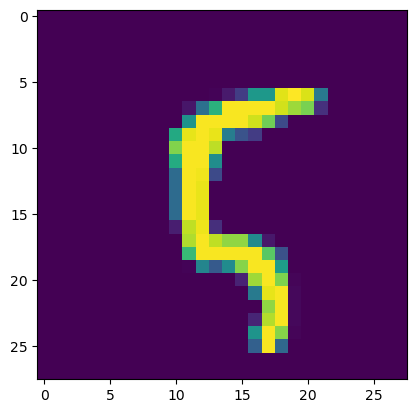

In [12]:
plt.imshow(ely_x_train[100][:,:,0])
print(ely_y_train[100])
#note the one-hot encoding below

In [13]:
batch_size = 64
num_classes = 10
epochs = 5

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [17]:
history = model.fit(ely_x_train, ely_y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 23170s 27s/step - loss: 0.2270 - acc: 0.9306 - val_loss: 0.0447 - val_acc: 0.9863
Epoch 2/5
844/844 [==============================] - 285s 338ms/step - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0381 - val_acc: 0.9905
Epoch 3/5
844/844 [==============================] - 3002s 4s/step - loss: 0.0574 - acc: 0.9834 - val_loss: 0.0500 - val_acc: 0.9880
Epoch 4/5
844/844 [==============================] - 1588s 2s/step - loss: 0.0519 - acc: 0.9855 - val_loss: 0.0300 - val_acc: 0.9910
Epoch 5/5
844/844 [==============================] - 1094s 1s/step - loss: 0.0498 - acc: 0.9865 - val_loss: 0.0378 - val_acc: 0.9910


In [19]:
test_loss, test_acc = model.evaluate(ely_x_test, ely_y_test)
print(test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.0316 - acc: 0.9909
0.9908999800682068


In [20]:
Y_pred = model.predict(ely_x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(ely_y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 6s 19ms/step


<Axes: >

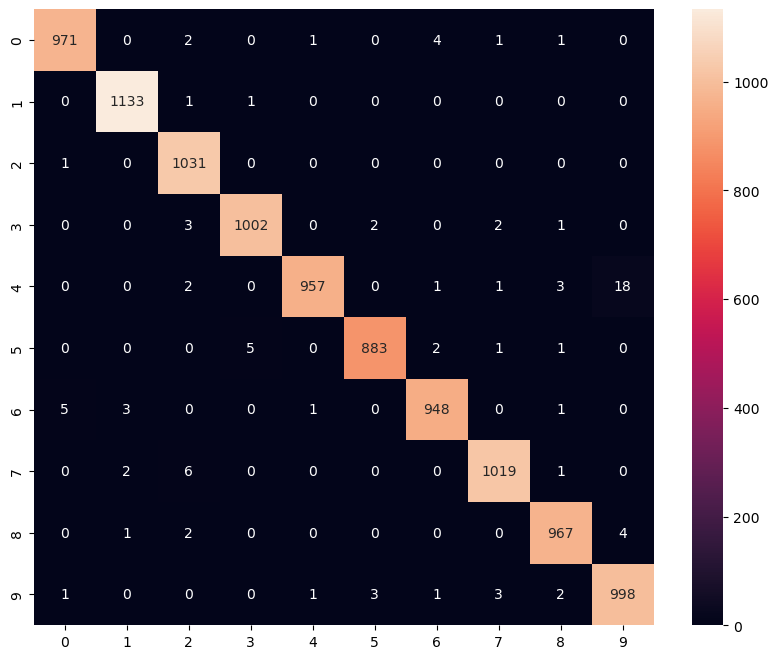

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')